In [1]:
import os
import random
import pandas as pd
import numpy as np
import cv2
import time
import threading

from tqdm import tqdm
from string_generator import (
    create_strings_from_dict,
    create_strings_from_file,
    create_strings_from_file_random,
    create_strings_from_wikipedia,
    create_strings_randomly
)
from data_generator import FakeTextDataGenerator
from multiprocessing import Pool
import matplotlib.pyplot as plt
from skimage import transform,data
import pandas as pd
from PIL import Image
from generate import gen_text_img

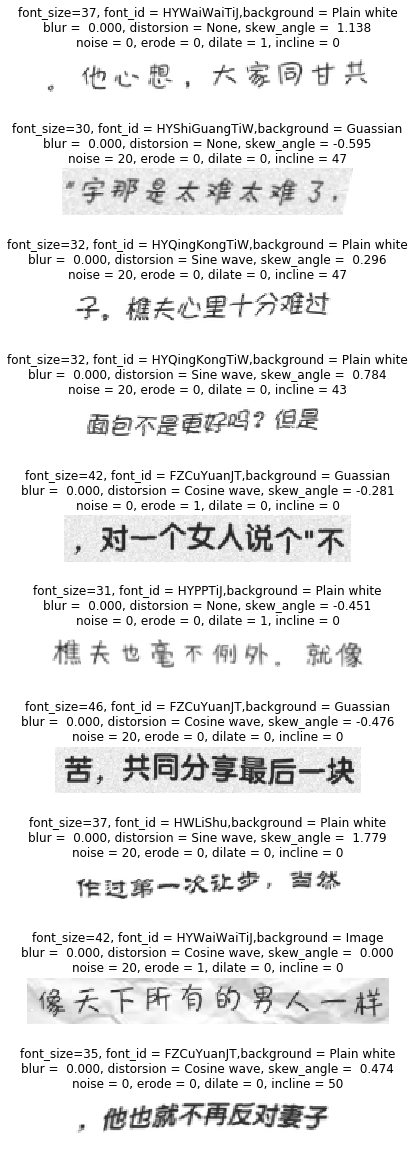

In [2]:
num = 20
use_file = 1
text = None
text_length = 10
font_size = 0
font_id = 0
space_width = 1
text_color = '#282828'
thread_count = 8

random_skew = True
skew_angle = 2
random_blur = True
blur = 0

orientation = 0
distorsion = -1
distorsion_orientation = 2
background = -1

random_process = 1
noise = 20
erode = 1
dilate = 1
incline = 50

imgs = []
df, img = gen_text_img(num, use_file, text, text_length, font_size, font_id, space_width, background, text_color,
                      orientation, blur, random_blur, distorsion, distorsion_orientation, skew_angle, random_skew,
                      random_process, noise, erode, dilate, incline,
                      thread_count)
base = 0
for i in range(num):
    temp = img[:,base:base+int(df.iloc[i]['img_shape']),:]
    imgs.append(Image.fromarray(temp))
    base += int(df.iloc[i]['img_shape'])
figs, axs = plt.subplots(ncols = 1, nrows=10,figsize=(20,20))
plt.subplots_adjust(wspace =0, hspace =1.5)
for r, (ax, img) in enumerate(zip(axs, imgs)):
    ax.axis('off')
    ax.imshow(img)
    ax.set_title(f'font_size={df.iloc[r].font_size}, font_id = {df.iloc[r].font_id},background = {df.iloc[r].background_type}'
                    f'\nblur = {float(df.iloc[r].blur) : .3f}, distorsion = {df.iloc[r].distorsion_type}, skew_angle = {float(df.iloc[r].skew_angle) : .3f}'
                    f'\nnoise = {df.iloc[r].num_noise}, erode = {df.iloc[r].erode}, dilate = {df.iloc[r].dilate}, incline = {df.iloc[r].incline}' )

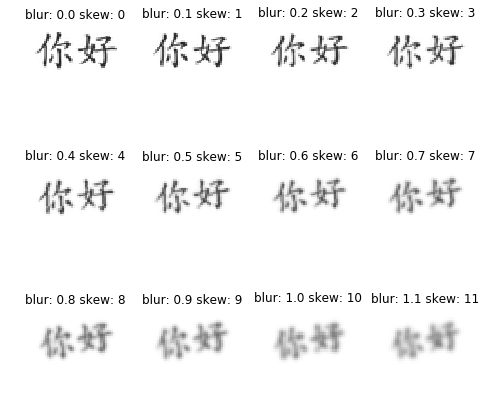

In [32]:
text = ['你好']*12
float = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1]
int = [0,1,2,3,4,5,6,7,8,9,10,11]
formats = pd.DataFrame({'use_file':[0]*12,'font_id':[1]*12,'blur': float,'text': text,'skew_angle': int})
n_ = formats.shape[0]

imgs = []
for r in range(n_):
    _, img = gen_text_img(**dict(formats.iloc[r]))
    img =Image.fromarray(img).convert('RGB')
    imgs.append(img) 

fig, axs = plt.subplots(ncols=4, nrows=3,figsize = (8,8))
plt.subplots_adjust(hspace = 0)
axs = axs.flatten()
for r, (ax, img) in enumerate(zip(axs, imgs)):
    ax.axis('off')
    ax.imshow(img)
    ax.set_title(f'blur: {formats.iloc[r].blur} skew: {formats.iloc[r].skew_angle}')

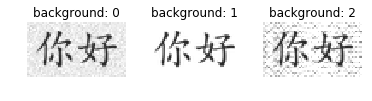

In [31]:
text = ['你好']*3
formats = pd.DataFrame({'use_file':[0]*3,'font_id':[1]*3,'text': text, 'background':[0,1,2]})
imgs = []
for r in range(len(text)):
    _, img = gen_text_img(**dict(formats.iloc[r]))
    img =Image.fromarray(img).convert('RGB')
    imgs.append(img) # **dict(formats.iloc[r])
fig, axs = plt.subplots(ncols=3, nrows=1)
axs = axs.flatten()
for r, (ax, img) in enumerate(zip(axs, imgs)):
    ax.axis('off')
    ax.imshow(img)
    ax.set_title(f'background: {formats.iloc[r].background}')

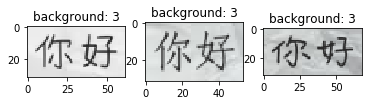

In [5]:
text = ['你好']*3
formats = pd.DataFrame({'use_file':[0]*3,'text': text, 'background':[3,3,3]})
imgs = []
for r in range(len(text)):
    _, img = gen_text_img(**dict(formats.iloc[r]))
    img =Image.fromarray(img).convert('RGB')
    imgs.append(img)
fig, axs = plt.subplots(ncols=3, nrows=1)
axs = axs.flatten()
for r, (ax, img) in enumerate(zip(axs, imgs)):
    ax.imshow(img)
    ax.set_title(f'background: {formats.iloc[r].background}')

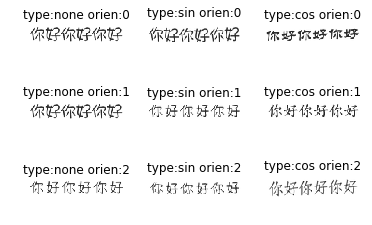

In [6]:
text = ['你好你好你好']*9
type = ['none','sin','cos','none','sin','cos','none','sin','cos']
formats = pd.DataFrame({'use_file':[0]*9,'text': text,'distorsion': [0,1,2,0,1,2,0,1,2],'distorsion_orientation':[0,0,0,1,1,1,2,2,2]})
imgs = []
for r in range(len(text)):
    _, img = gen_text_img(**dict(formats.iloc[r]))
    img =Image.fromarray(img).convert('RGB')
    imgs.append(img) # **dict(formats.iloc[r])
    
fig, axs = plt.subplots(ncols=3, nrows=3)
axs = axs.flatten()
for r, (ax, img) in enumerate(zip(axs, imgs)):
    ax.axis('off')
    ax.imshow(img)
    ax.set_title(f'type:{type[r]} orien:{formats.iloc[r].distorsion_orientation}')

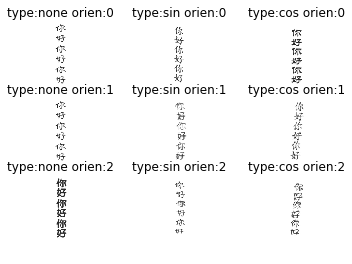

In [7]:
text = ['你好你好你好']*9
type = ['none','sin','cos','none','sin','cos','none','sin','cos']
formats = pd.DataFrame({'use_file':[0]*9,'text': text,'orientation':[1]*9,'distorsion': [0,1,2,0,1,2,0,1,2],'distorsion_orientation':[0,0,0,1,1,1,2,2,2]})
imgs = []
for r in range(len(text)):
    _, img = gen_text_img(**dict(formats.iloc[r]))
    img =Image.fromarray(img).convert('RGB')
    imgs.append(img) # **dict(formats.iloc[r])
    
fig, axs = plt.subplots(ncols=3, nrows=3)
axs = axs.flatten()
for r, (ax, img) in enumerate(zip(axs, imgs)):
    ax.axis('off')
    ax.imshow(img)
    ax.set_title(f'type:{type[r]} orien:{formats.iloc[r].distorsion_orientation}')

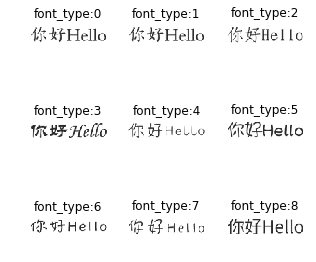

In [25]:
text = ['你好Hello']*9
font_id = [0,1,2,3,4,5,6,7,8]
formats = pd.DataFrame({'use_file':[0]*9,'text' : text, 'font_id': font_id})
imgs = []
for r in range(len(text)):
    _, img = gen_text_img(**dict(formats.iloc[r]))
    img =Image.fromarray(img).convert('RGB')
    imgs.append(img) 
    
fig, axs = plt.subplots(ncols=3, nrows=3,figsize=(5,5))
axs = axs.flatten()
for r, (ax, img) in enumerate(zip(axs, imgs)):
    ax.axis('off')
    ax.imshow(img)
    ax.set_title(f'font_type:{font_id[r]}')

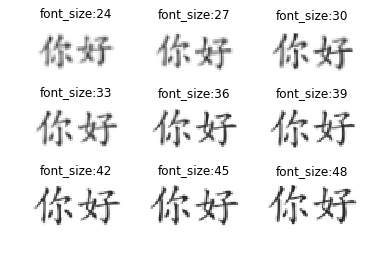

In [26]:
text = ['你 好']*9
font_size = [i for i in range(24,9*3+24,3)]
formats = pd.DataFrame({'use_file':[0]*9,'font_id':[1]*9,'text': text,'font_size': font_size})
imgs = []
for r in range(len(text)):
    _, img = gen_text_img(**dict(formats.iloc[r]))
    img =Image.fromarray(img).convert('RGB')
    imgs.append(img) # **dict(formats.iloc[r])
    
fig, axs = plt.subplots(ncols=3, nrows=3)
axs = axs.flatten()
for r, (ax, img) in enumerate(zip(axs, imgs)):
    ax.axis('off')
    ax.imshow(img)
    ax.set_title(f'font_size:{font_size[r]}')

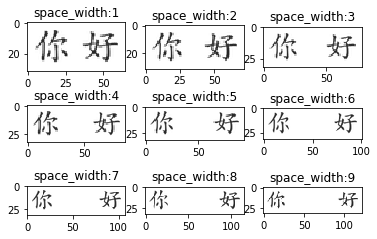

In [27]:
text = ['你 好']*9
space_width = [j for j in range(1,1+9*1,1)]
formats = pd.DataFrame({'use_file':[0]*9,'font_id':[1]*9,'text': text,'space_width': space_width})
imgs = []
for r in range(len(text)):
    _, img = gen_text_img(**dict(formats.iloc[r]))
    img =Image.fromarray(img).convert('RGB')
    imgs.append(img) # **dict(formats.iloc[r])
    
fig, axs = plt.subplots(ncols=3, nrows=3)
axs = axs.flatten()
for r, (ax, img) in enumerate(zip(axs, imgs)):
    ax.imshow(img)
    ax.set_title(f'space_width:{space_width[r]}')

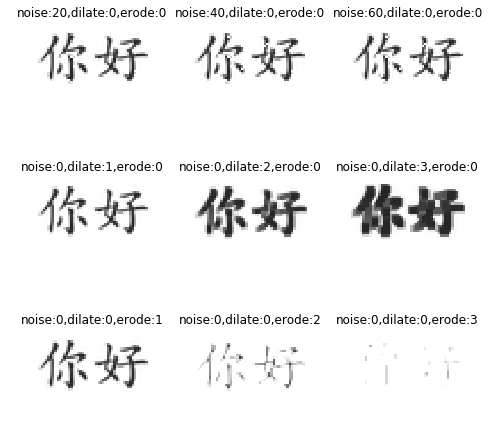

In [29]:
text = ['你好']*9
noise = [20,40,60,0,0,0,0,0,0]
dilate = [0,0,0,1,2,3,0,0,0]
erode = [0,0,0,0,0,0,1,2,3]
formats = pd.DataFrame({'use_file':[0]*9,'font_id':[1]*9,'random_process':[0]*9,'text': text,'noise': noise,'erode':erode, 'dilate':dilate})
imgs = []
for r in range(len(text)):
    _, img = gen_text_img(**dict(formats.iloc[r]))
    img =Image.fromarray(img).convert('RGB')
    imgs.append(img) # **dict(formats.iloc[r])
    
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(8,8))
axs = axs.flatten()
for r, (ax, img) in enumerate(zip(axs, imgs)):
    ax.axis('off')
    ax.imshow(img)
    ax.set_title(f'noise:{noise[r]},dilate:{dilate[r]},erode:{erode[r]}')

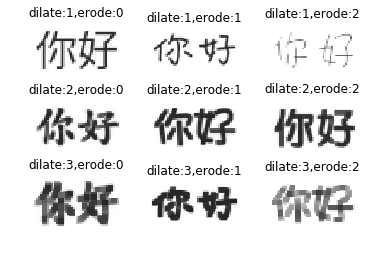

In [12]:
text = ['你好']*9
dilate = [1,1,1,2,2,2,3,3,3]
erode = [0,1,2,0,1,2,0,1,2]
formats = pd.DataFrame({'use_file':[0]*9,'random_process':[0]*9,'text': text,'erode':erode, 'dilate':dilate})
imgs = []
for r in range(len(text)):
    _, img = gen_text_img(**dict(formats.iloc[r]))
    img =Image.fromarray(img).convert('RGB')
    imgs.append(img) # **dict(formats.iloc[r])
    
fig, axs = plt.subplots(ncols=3, nrows=3)
axs = axs.flatten()
for r, (ax, img) in enumerate(zip(axs, imgs)):
    ax.axis('off')
    ax.imshow(img)
    ax.set_title(f'dilate:{dilate[r]},erode:{erode[r]}')

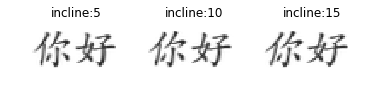

In [30]:
text = ['你好']*3
incline = [5,10,15]
formats = pd.DataFrame({'use_file':[0]*3,'font_id':[1]*3, 'random_process':[0]*3,'incline':incline,'text': text})
imgs = []
for r in range(len(text)):
    _, img = gen_text_img(**dict(formats.iloc[r]))
    img =Image.fromarray(img).convert('RGB')
    imgs.append(img) # **dict(formats.iloc[r])
    
fig, axs = plt.subplots(ncols=3, nrows=1)
axs = axs.flatten()
for r, (ax, img) in enumerate(zip(axs, imgs)):
    ax.axis('off')
    ax.imshow(img)
    ax.set_title(f'incline:{incline[r]}')